In [147]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter, OrderedDict



# Data Preparation

In [148]:
daftar_abusive = pd.read_csv('/Users/chandra/Documents/BINAR_DSC_ENV/Asset Challenge 2/abusive.csv')['ABUSIVE'].tolist()
new_kamusalay = pd.read_csv('/Users/chandra/Documents/BINAR_DSC_ENV/Asset Challenge 2/new_kamusalay.csv', encoding= 'ISO-8859-1', header=None)

data = pd.read_csv('/Users/chandra/Documents/BINAR_DSC_ENV/Asset Challenge 2/data.csv', encoding= 'ISO-8859-1')


In [149]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [150]:
data.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [151]:
data.shape

(13169, 13)

In [152]:
data.duplicated().sum()

125

In [153]:
data = data.drop_duplicates()

In [154]:
data.duplicated().sum()

0

In [155]:
data.shape

(13044, 13)

In [156]:
data.isna()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [157]:
data.isna().sum()/data.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [158]:
data['total_char'] = data.Tweet.apply(len)

In [159]:
data['total_word'] = data.Tweet.apply(lambda sent: len(sent.split()))

In [160]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


# Data Cleansing

In [161]:
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

new_kamusalay_convert = dict(zip(new_kamusalay[0], new_kamusalay[1]))

def normalize_alay(text):
    return ' '.join([new_kamusalay_convert[x] if x in new_kamusalay_convert else x for x in text.split(' ')])

In [162]:
def preprocess(text):
    text = lowercase(text)
    text = remove_nonaplhanumeric(text)
    text = remove_unnecessary_char(text)
    text = normalize_alay(text)
    return text

In [163]:
data['Tweet'] = data['Tweet'].apply(preprocess)
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


# Statistika Deskriptif

In [164]:
data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
count,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000
mean,0.423030,0.383701,0.271389,0.151641,0.060488,0.043162,0.024686,0.023306,0.284115,0.256670,0.130175,0.036185,114.124348,17.264259
std,0.494059,0.486305,0.444693,0.358686,0.238397,0.203229,0.155171,0.150879,0.451009,0.436812,0.336509,0.186758,69.101629,10.242584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,152.000000,23.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,561.000000,52.000000


In [165]:
data['total_char'].median()

100.0

In [166]:
data['total_word'].median()

15.0

In [167]:
data['total_char'].mode()

0    254
Name: total_char, dtype: int64

In [168]:
data['total_word'].mode()

0    11
Name: total_word, dtype: int64

In [191]:
p0_char = data.total_char.min()
p100_char = data.total_char.max()

range_total_char = p100_char - p0_char
range_total_char

557

In [192]:
p0_word = data.total_word.min()
p100_word = data.total_word.max()

range_total_word = p100_word - p0_word
range_total_word

51

In [171]:
q1_char = data.total_char.quantile(0.25)
q3_char = data.total_char.quantile(0.75)

iqr_char = q3_char - q1_char
iqr_char

93.0

In [172]:
lower_limit_char = q1_char - 1.5*iqr_char
upper_limit_char = q3_char + 1.5*iqr_char

In [194]:
if lower_limit_char < p0_char:
    print("Tidak ada outlier dari sisi batas bawah")
else:
    print("Ada outlier dari sisi batas bawah")

if upper_limit_char > p100_char:
    print("Tidak ada outlier dari sisi batas atas")
else:
    print("Ada outlier dari sisi batas atas")

Tidak ada outlier dari sisi batas bawah
Ada outlier dari sisi batas atas


In [173]:
q1_word = data.total_word.quantile(0.25)
q3_word = data.total_word.quantile(0.75)

iqr_word = q3_word - q1_word
iqr_word

14.0

In [174]:
lower_limit_word = q1_word - 1.5*iqr_word
upper_limit_word = q3_word + 1.5*iqr_word
 

In [195]:
if lower_limit_word < p0_word:
    print("Tidak ada outlier dari sisi batas bawah")
else:
    print("Ada outlier dari sisi batas bawah")

if upper_limit_word > p100_word:
    print("Tidak ada outlier dari sisi batas atas")
else:
    print("Ada outlier dari sisi batas atas")

Tidak ada outlier dari sisi batas bawah
Ada outlier dari sisi batas atas


In [175]:
data['total_char'].skew()

0.6936467482723248

In [176]:
data['total_word'].skew()

0.7898198026333267

In [177]:
data['total_char'].kurtosis()

-0.4022908274147734

In [178]:
data['total_word'].kurtosis()

-0.15170747414709895

# Visualisasi

<Axes: >

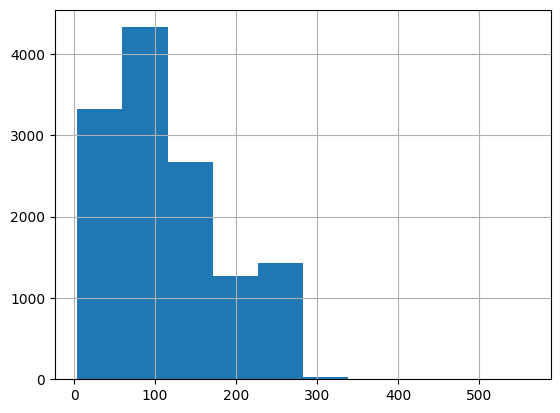

In [179]:
data.total_char.hist()

<Axes: >

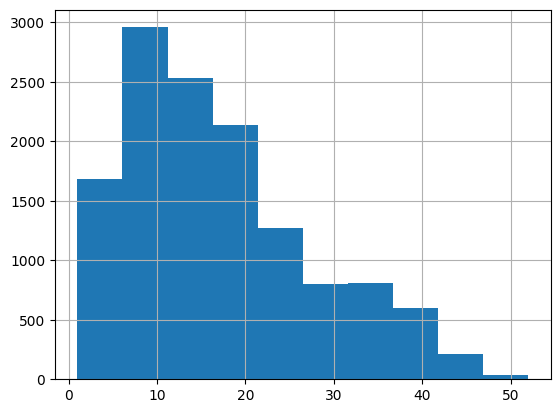

In [180]:
data.total_word.hist()

<Axes: >

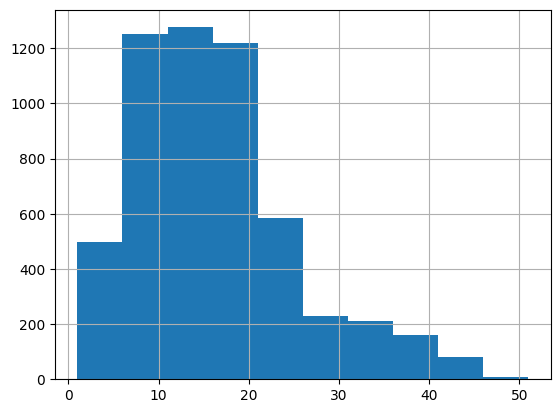

In [181]:
data_HS = data['total_word'].loc[data['HS'] == 1]
data_HS.hist()

<Axes: >

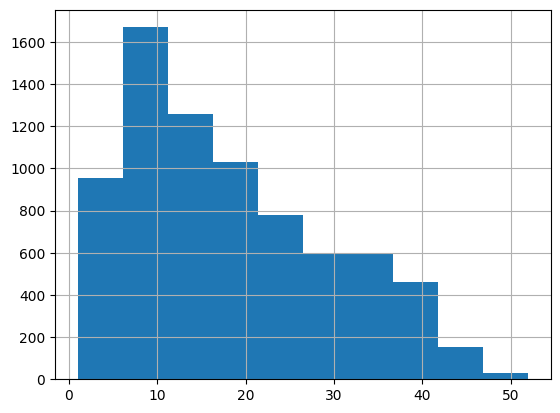

In [182]:
data_HS1 = data['total_word'].loc[data['HS'] == 0]
data_HS1.hist()

<Axes: xlabel='total_word', ylabel='total_char'>

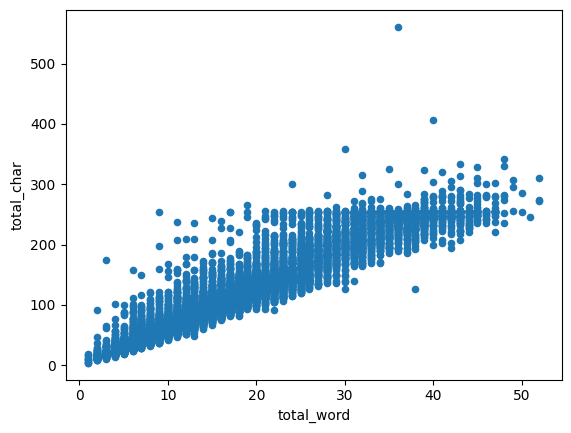

In [183]:
data.plot(x='total_word', y='total_char', kind= 'scatter')

In [184]:
tweets_slicing = []

for tweet in data['Tweet'].str.split():
    for word in tweet:
        if len(word) > 0 and word in daftar_abusive:
            tweets_slicing.append(word)

In [185]:
tweets_slicing

['bego',
 'edan',
 'sarap',
 'sipit',
 'cebong',
 'kafir',
 'dungu',
 'bani',
 'taplak',
 'kampret',
 'ngewe',
 'bacot',
 'banci',
 'jablay',
 'pecun',
 'onta',
 'kafir',
 'ampas',
 'monyet',
 'banci',
 'anjing',
 'noob',
 'setan',
 'komunis',
 'cebong',
 'antek',
 'asing',
 'nete',
 'sipit',
 'homo',
 'ngentot',
 'gay',
 'gembel',
 'bangsat',
 'bajingan',
 'edan',
 'kafir',
 'bejat',
 'hina',
 'anjir',
 'bego',
 'bodoh',
 'gila',
 'kampret',
 'dungu',
 'dungu',
 'cebong',
 'nete',
 'bani',
 'iblis',
 'banci',
 'homo',
 'kafir',
 'bisu',
 'setan',
 'ateis',
 'bangsat',
 'bajingan',
 'homo',
 'cocot',
 'asing',
 'bangkai',
 'komunis',
 'komunis',
 'ngentot',
 'babi',
 'asing',
 'asing',
 'asing',
 'rezim',
 'asing',
 'sipit',
 'kampang',
 'onta',
 'cebong',
 'najis',
 'transgender',
 'anjing',
 'titit',
 'bacot',
 'kafir',
 'bodoh',
 'iblis',
 'goblok',
 'bani',
 'cebong',
 'cebong',
 'rezim',
 'antek',
 'asing',
 'asing',
 'asing',
 'asing',
 'asing',
 'pecun',
 'cacat',
 'pantat',
 'b

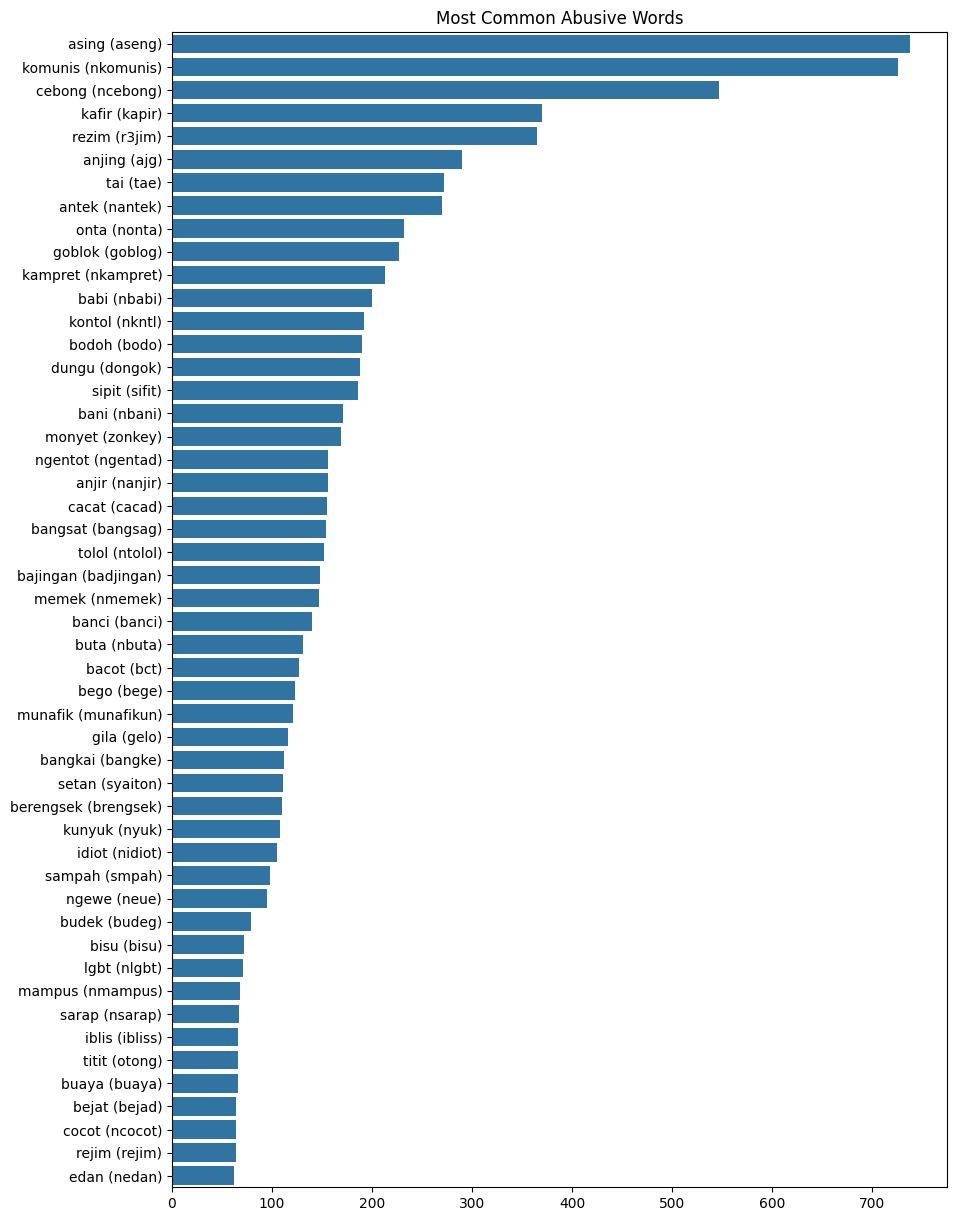

In [186]:
tweets_counter = Counter(tweets_slicing).most_common()

top_tweets = OrderedDict(tweets_counter)

show_only = 50
    
keys = list(top_tweets.keys())
vals = [top_tweets[k] for k in keys]

original_slang = []
for word in keys:
    if word in new_kamusalay[1].values:
        original_slang.append(new_kamusalay.loc[new_kamusalay[1] == word, 0].values[0])
    else:
        original_slang.append(word)
        
combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]

plt.figure(figsize=(10, 15))
sns.barplot(x=vals[:show_only], y=combined_words[:show_only])
plt.title('Most Common Abusive Words')
plt.show()

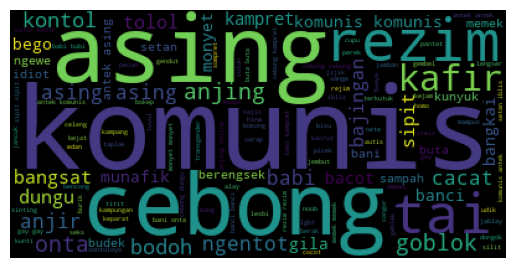

In [187]:
text = ' '.join(tweets_slicing)
wc = WordCloud().generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()

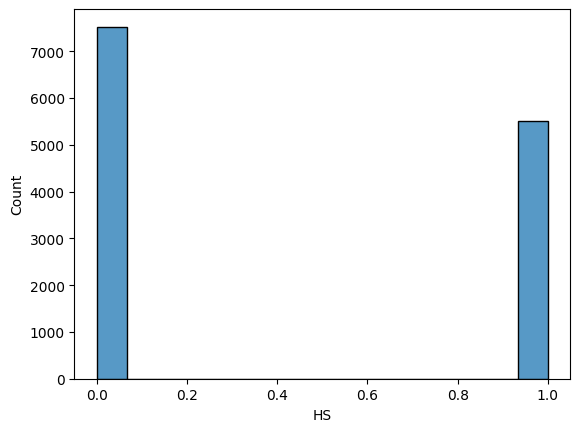

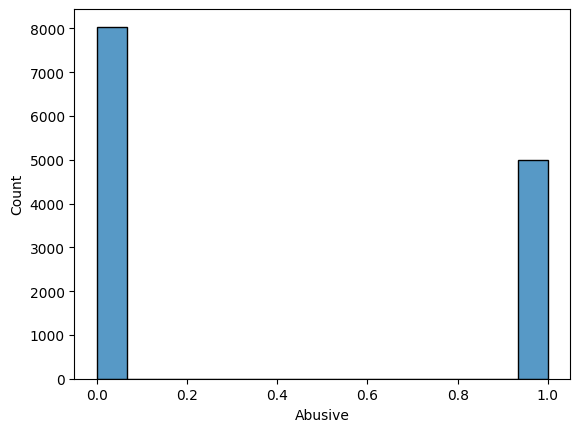

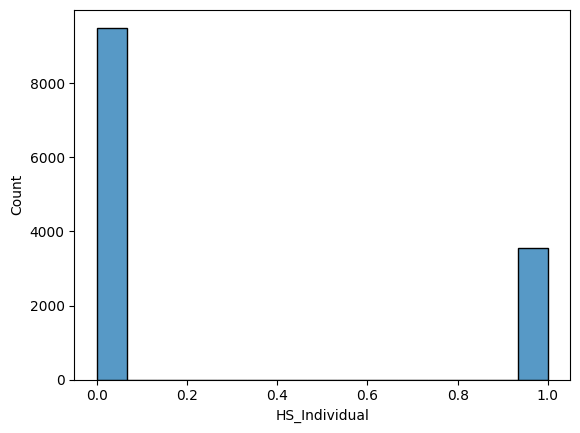

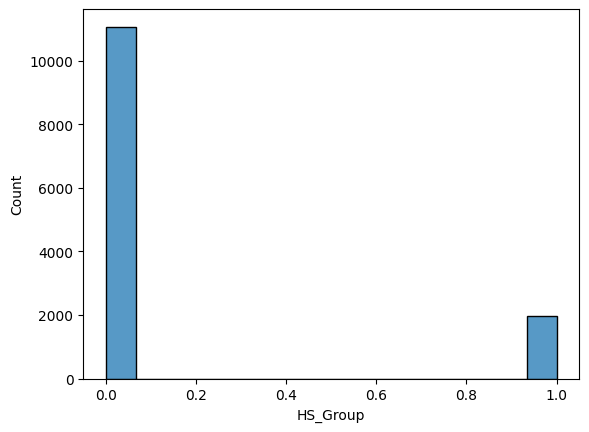

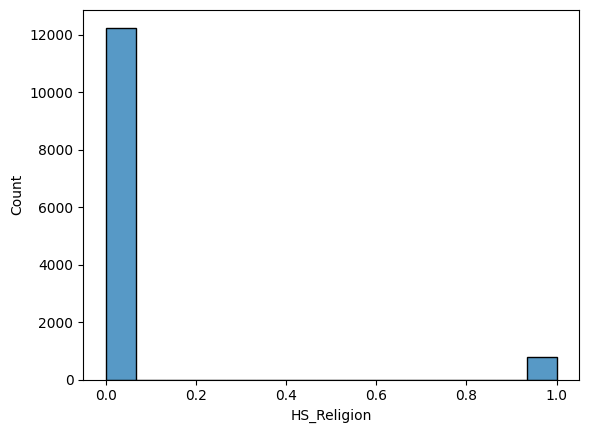

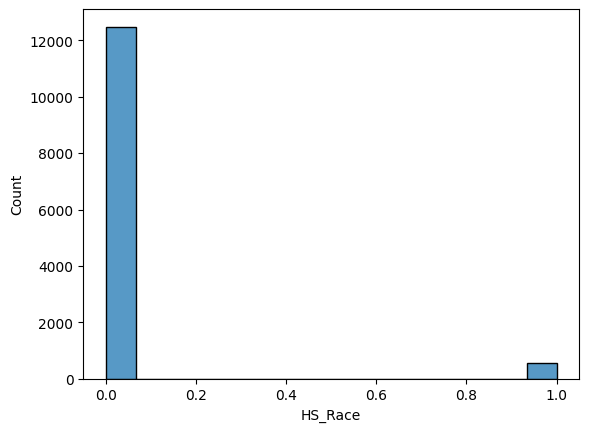

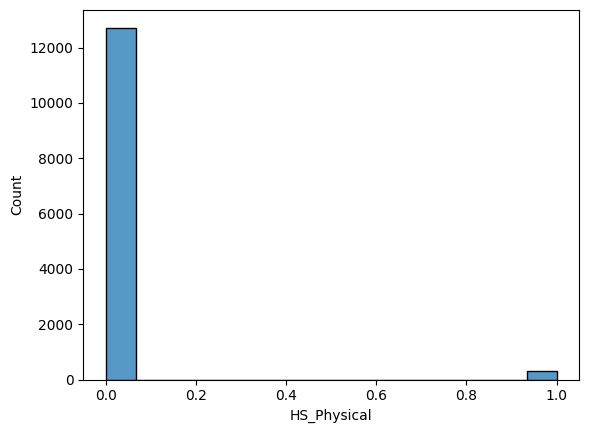

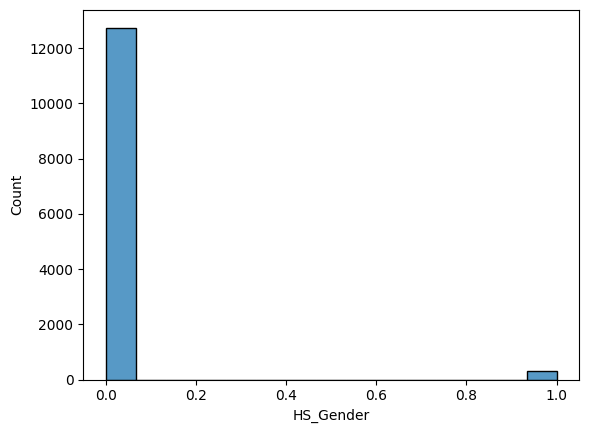

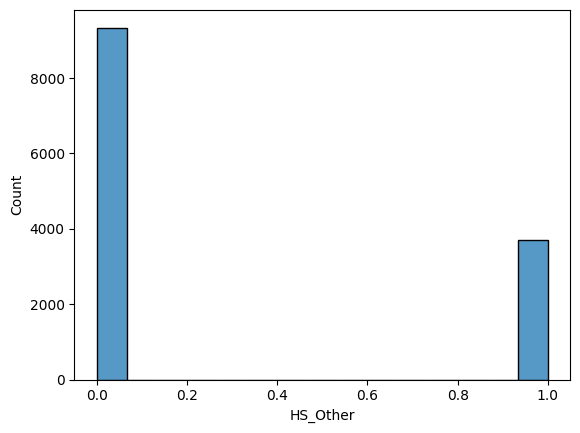

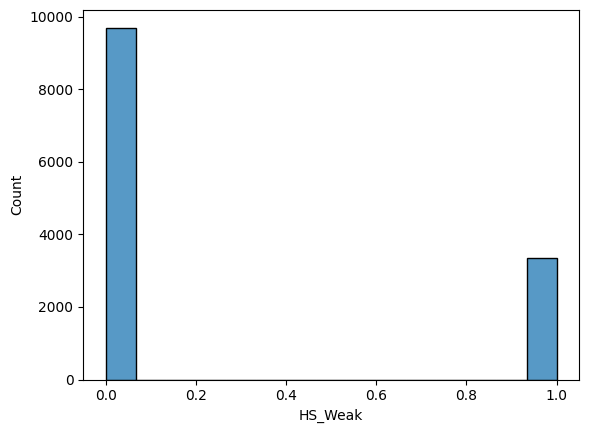

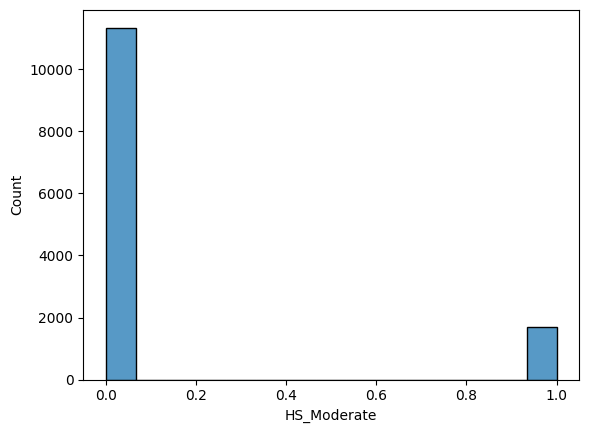

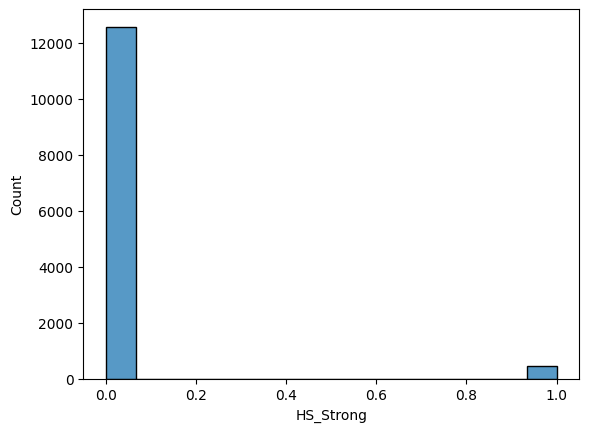

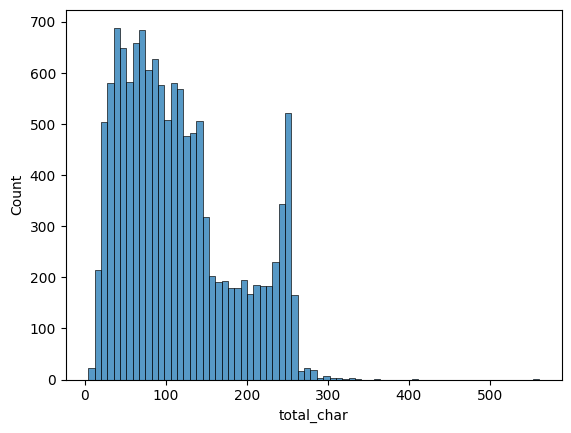

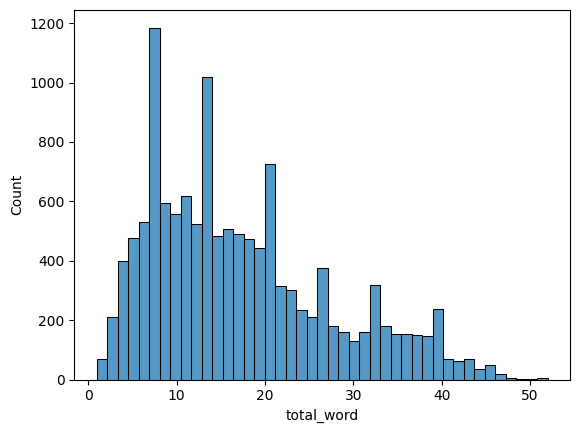

In [188]:
df1 = data.drop(['Tweet'], axis=1)
for i in df1.columns:
    j = 1
    plt.figure(j)
    sns.histplot(data=df1, x=i)
    plt.show()
    j = j+1

In [189]:
df2 = df1.sum()
df2

HS                  5518
Abusive             5005
HS_Individual       3540
HS_Group            1978
HS_Religion          789
HS_Race              563
HS_Physical          322
HS_Gender            304
HS_Other            3706
HS_Weak             3348
HS_Moderate         1698
HS_Strong            472
total_char       1488638
total_word        225195
dtype: int64

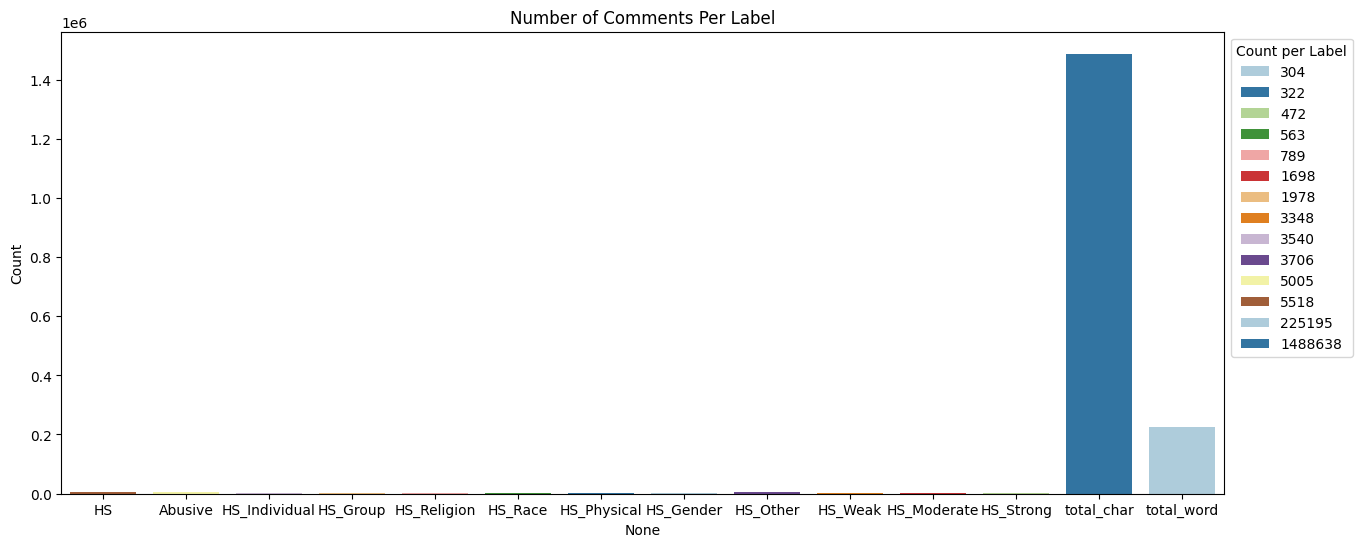

In [190]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df2.index, y=df2.values, hue=df2.values, dodge=False, palette='Paired')
plt.ylabel('Count')
plt.title("Number of Comments Per Label")
leg = plt.legend(title='Count per Label', bbox_to_anchor=(1,1))